# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [7]:
def apply_svd_custom(X_train, X_test, n_components):
    # Step 1: Center the training data (subtract the mean of each feature)
    X_train_centered = X_train - np.mean(X_train, axis=0)

    # Step 2: Compute the covariance matrix (X^T * X)
    covariance_matrix = np.dot(X_train_centered.T, X_train_centered) / (X_train_centered.shape[0] - 1)

    # Step 3: Perform eigen decomposition of the covariance matrix
    eig_values, eig_vectors = np.linalg.eigh(covariance_matrix)

    # Step 4: Sort eigenvalues and corresponding eigenvectors
    sorted_indices = np.argsort(eig_values)[::-1]  # Sort in descending order
    eig_values = eig_values[sorted_indices]
    eig_vectors = eig_vectors[:, sorted_indices]

    # Step 5: Select the top `n_components` eigenvectors (singular vectors)
    eig_vectors_reduced = eig_vectors[:, :n_components]

    # Step 6: Project the centered training and test data onto the new eigenspace
    X_train_reduced = np.dot(X_train_centered, eig_vectors_reduced)
    X_test_centered = X_test - np.mean(X_test, axis=0)
    X_test_reduced = np.dot(X_test_centered, eig_vectors_reduced)

    # Return the reduced datasets and the top singular vectors (eigenvectors)
    return X_train_reduced, X_test_reduced, eig_vectors_reduced

## Part 3: Train Logistic Regression and Measure Performance

In [3]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [5]:
# List of SVD components to search through
svd_components = [50, 100, 200, 300, 500, 784]  # You can modify these based on your experimentation

# Store the results in a list
results = []

print("Training models with different levels of SVD preprocessing...")

for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to reduce dimensionality
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)

    # Train logistic regression and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    # Store results in a dictionary
    results.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'training_time': training_time
    })

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

# Print or analyze the results after the loop
print("\nFinal Results:")
for result in results:
    print(f"SVD components: {result['n_components']}, Accuracy: {result['accuracy']:.4f}, Training time: {result['training_time']:.4f} seconds")

Training models with different levels of SVD preprocessing...
Applying custom SVD with 50 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9082, Training time: 15.4685 seconds
Applying custom SVD with 100 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9173, Training time: 50.8573 seconds
Applying custom SVD with 200 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 200, Accuracy: 0.9208, Training time: 110.1488 seconds
Applying custom SVD with 300 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 300, Accuracy: 0.9206, Training time: 177.0667 seconds
Applying custom SVD with 500 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 500, Accuracy: 0.9211, Training time: 355.6588 seconds
Applying custom SVD with 784 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9209, Training time: 589.5238 seconds

Final Results:
SVD components: 50, Accuracy: 0.9082, Training time: 15.4685 seconds
SVD components: 100, Accuracy: 0.9173, Training time: 50.8573 seconds
SVD components: 200, Accuracy: 0.9208, Training time: 110.1488 seconds
SVD components: 300, Accuracy: 0.9206, Training time: 177.0667 seconds
SVD components: 500, Accuracy: 0.9211, Training time: 355.6588 seconds
SVD components: 784, Accuracy: 0.9209, Training time: 589.5238 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


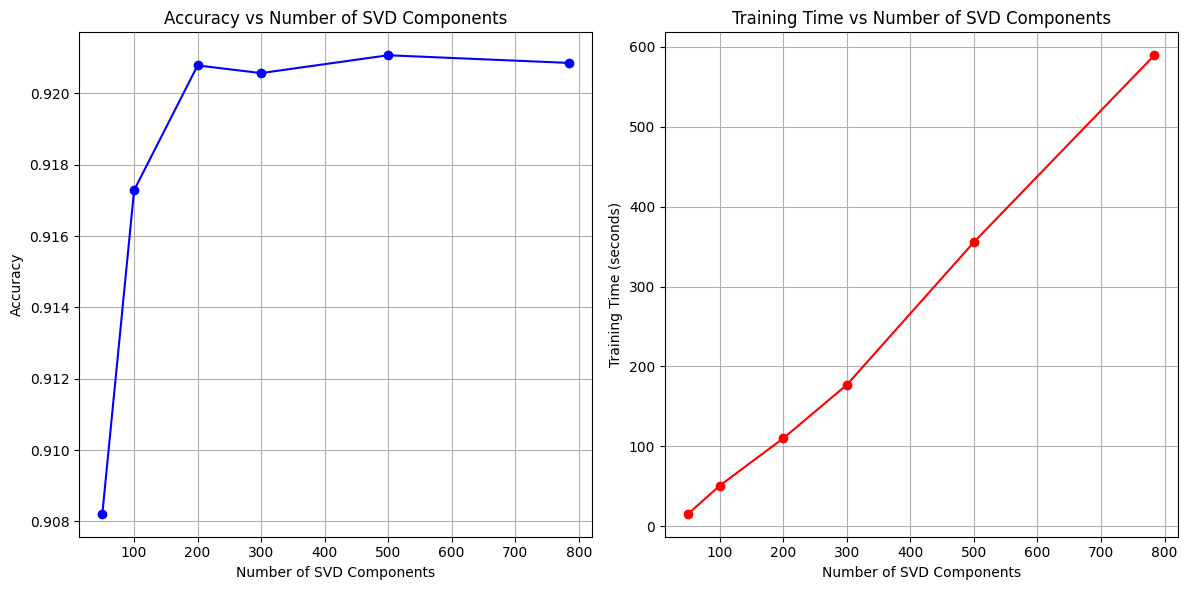

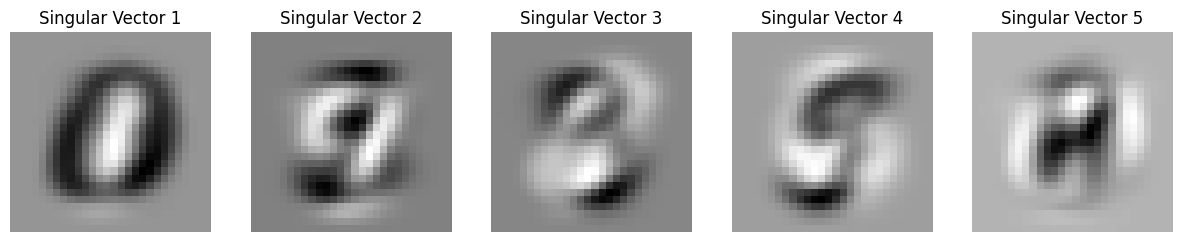

In [11]:
import matplotlib.pyplot as plt

# Function to visualize accuracy and training time as a function of SVD components
def visualize_results(results):
    # Extract components, accuracy, and training time from results
    components = [r['n_components'] for r in results]
    accuracies = [r['accuracy'] for r in results]
    training_times = [r['training_time'] for r in results]

    # Plot accuracy as a function of SVD components
    plt.figure(figsize=(12, 6))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(components, accuracies, marker='o', color='b')
    plt.title('Accuracy vs Number of SVD Components')
    plt.xlabel('Number of SVD Components')
    plt.ylabel('Accuracy')
    plt.grid(True)

    # Training time plot
    plt.subplot(1, 2, 2)
    plt.plot(components, training_times, marker='o', color='r')
    plt.title('Training Time vs Number of SVD Components')
    plt.xlabel('Number of SVD Components')
    plt.ylabel('Training Time (seconds)')
    plt.grid(True)

    # Show the plots
    plt.tight_layout()
    plt.show()

# Function to visualize top 5 singular vectors
def visualize_singular_vectors(singular_vectors):
    fig, axs = plt.subplots(1, 5, figsize=(15, 3))

    for i in range(5):
        # Reshape the singular vectors (which have 784 dimensions) to 28x28 images
        img = singular_vectors[:, i][:784].reshape(28, 28)  # Take only the first 784 values for each vector
        axs[i].imshow(img, cmap='gray')
        axs[i].set_title(f'Singular Vector {i+1}')
        axs[i].axis('off')

    # Show the singular vector plots
    plt.show()
visualize_results(results)
# To visualize the top 5 singular vectors, extract them from the SVD applied earlier
_, _, top_singular_vectors = apply_svd_custom(X_train, X_test, 784)  # Compute SVD with full number of components for the top singular vectors
visualize_singular_vectors(top_singular_vectors)

## Part 6: Analyze / Conclusion

YOUR ANSWER: Once you get to 200 SVD components, then the accuracy sticks at about .92. It seems like it is not worth it going past about 200 components for this data, especially because the training time keeps going up at the same rate or higher. The first vector is obviously a 0, while the others are less and less less obvious what letters they are. The different vectors show varius numbers as well.